In [215]:
%matplotlib inline
import argparse
import os
import sys
sys.path.insert(0, "~/git/timesnet_dev/Time-Series-Library/")
import torch
import torch.backends
from exp.exp_long_term_forecasting import Exp_Long_Term_Forecast
from exp.exp_imputation import Exp_Imputation
from exp.exp_short_term_forecasting import Exp_Short_Term_Forecast
from exp.exp_long_term_forecasting_no_revin import Exp_Long_Term_Forecast_NoRevin
from exp.exp_anomaly_detection import Exp_Anomaly_Detection
from exp.exp_classification import Exp_Classification
from utils.print_args import print_args
import random
import numpy as np
from types import SimpleNamespace
import json
import pandas as pd
import matplotlib.pyplot as plt

# preprare dataset

In [156]:
btc = pd.read_csv("~/git/timesnet_dev/Time-Series-Library/dataset/btc.csv")

In [157]:
btc.columns

Index(['date', 'max_short_vol', 'max_long_vol', 'short_amt', 'long_amt',
       'long_vol', 'short_vol', 'long_session_count', 'short_session_count',
       'true_range', 'close', 'high', 'low', 'open', 'mid', 'vwap', 'pct'],
      dtype='object')

In [158]:
btc['pct'] = btc['close'].pct_change(30).shift(-29)

In [159]:
btc.iloc[1:-30].isnull().sum()

date                   0
max_short_vol          0
max_long_vol           0
short_amt              0
long_amt               0
long_vol               0
short_vol              0
long_session_count     0
short_session_count    0
true_range             0
close                  0
high                   0
low                    0
open                   0
mid                    0
vwap                   0
pct                    0
dtype: int64

In [160]:
btc.iloc[1:-30].to_csv("~/git/timesnet_dev/timesnet_learning/dataset/btc_pct30_long.csv",index=False)

In [13]:
btc.isnull().sum()

date                    0
max_short_vol           0
max_long_vol            0
short_amt               0
long_amt                0
long_vol                0
short_vol               0
long_session_count      0
short_session_count     0
true_range              0
close                   0
high                    0
low                     0
open                    0
mid                     0
vwap                    0
pct                    30
dtype: int64

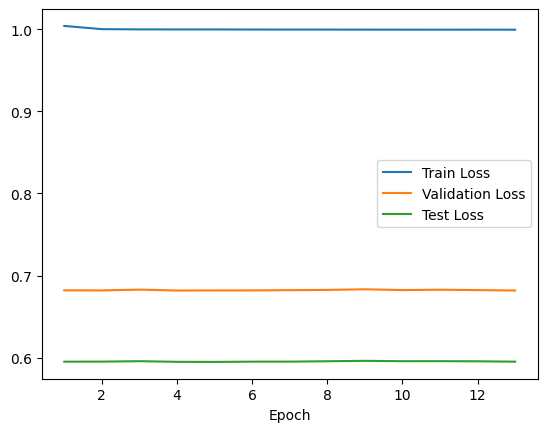

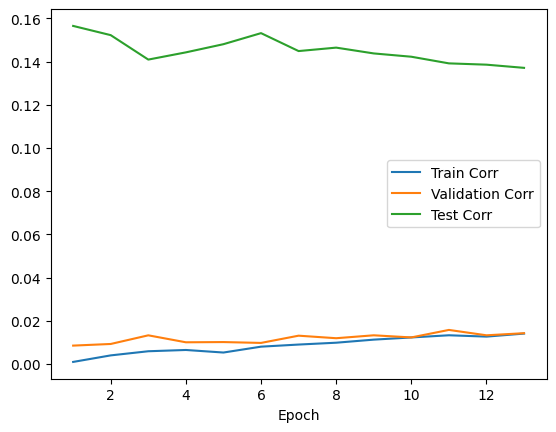

In [214]:
exp_label = "long_term_forecast_no_revin_btc_pct30_target_norevin_TimesNet_norevin_custom_target_ftMS_sl360_ll0_pl1_dm6_nh8_el1_dl1_df6_expand2_dc4_fc3_ebtimeF_dtTrue_Exp_0"
loss_corr = f"~/git/timesnet_dev/timesnet_learning/checkpoints/{exp_label}/losses_and_correlations.csv"
loss_corr_df = pd.read_csv(loss_corr)
loss_corr_df.set_index('Epoch',inplace=True)
plt.close()
loss_corr_df[['Train Loss','Validation Loss', 'Test Loss']].plot()
plt.show()
plt.close()
loss_corr_df[['Train Corr','Validation Corr', 'Test Corr']].plot()
plt.show()

,Epoch,Train Loss,Validation Loss,Test Loss,Train Corr,Validation Corr,Test Corr
0,1,0.997631,0.681945,0.595132,0.001015,0.008626,0.038449
1,2,0.996793,0.681974,0.594896,0.012946,0.007242,0.069508


In [210]:
#long_term_forecast_no_revin_btc_pct30_target_norevin_TimesNet_norevin_custom_target_ftMS_sl360_ll0_pl1_dm8_nh8_el1_dl1_df8_expand2_dc4_fc3_ebtimeF_dtTrue_Exp_0
args = {
    "task_name": "long_term_forecast_no_revin",
    "is_training": 1,
    "model_id": "btc_pct30_target_norevin",
    "model": "TimesNet_norevin",
    "data": "custom_target",
    "root_path": "./dataset/ETT-small/",
    "data_path": "btc_pct30_short.csv",
    "features": "MS",
    "target": "pct",
    "freq": "t",
    "checkpoints": "./checkpoints/",
    "seq_len": 360,
    "label_len": 0,
    "pred_len": 1,

    "enc_in": 4,
    "dec_in": 7,
    "c_out": 1,
    
    "e_layers": 1,
    "d_model": 8,
    "d_ff": 8,
    "top_k": 4,
    "num_kernels": 6,
    "dropout": 0.3,
    
    "embed": "timeF",
    "activation": "gelu",
  
    "batch_size": 512,
    "patience": 10,
    "learning_rate": 0.001,
    "des": "Exp",
    "loss": "MSE",
    "lradj": "constant",

    "use_gpu": False,
    "gpu": 0,
    "gpu_type": "cuda",
    "use_multi_gpu": False,
    "devices": "0,1,2,3",
    "p_hidden_dims": [128, 128],
    "p_hidden_layers": 2,
    "use_dtw": False,
    "augmentation_ratio": 0,
    "seed": 2,
    "jitter": False,
    "scaling": False,
    "permutation": False,
    "randompermutation": False,
    "magwarp": False,
    "timewarp": False,
    "windowslice": False,
    "windowwarp": False,
    "rotation": False,
    "spawner": False,
    "dtwwarp": False,
    "shapedtwwarp": False,
    "wdba": False,
    "discdtw": False,
    "discsdtw": False,
    "extra_tag": "",
    "patch_len": 16,
    "device": 'cpu',
    "seasonal_patterns": "Monthly",
    "inverse": False,
    "mask_rate": 0.25,
    "anomaly_ratio": 0.25,
    "expand": 2,
    "d_conv": 4,
    "n_heads": 8,
    "d_layers": 1,
    "moving_avg": 25,
    "factor": 3,
    "distil": True,
    "channel_independence": 1,
    "decomp_method": "moving_avg",
    "use_norm": 1,
    "down_sampling_layers": 0,
    "down_sampling_window": 1,
    "down_sampling_method": None,
    "seg_len": 720,
    "num_workers": 10,
    "itr": 1,
    "train_epochs": 100,
    "use_amp": False,
}
args = SimpleNamespace(**args)
exp = Exp_Long_Term_Forecast_NoRevin(args)  # set experiments

Use CPU


In [9]:
test_set, test_loader = exp._get_data('test')  # get data
test_set

test 435734


In [13]:
test_set.data_y

array([[ 3.54100000e+00,  4.73600000e+00,  4.11728761e+06, ...,
         6.12699500e+04,  6.12736263e+04, -3.19793766e-04],
       [ 4.87700000e+00,  7.66700000e+00,  3.34080269e+06, ...,
         6.13350500e+04,  6.13143986e+04,  1.06414406e-03],
       [ 8.50400000e+00,  5.58400000e+00,  3.49715612e+06, ...,
         6.12930500e+04,  6.13016658e+04, -6.84762885e-04],
       ...,
       [ 1.17730000e+01,  9.88000000e+00,  3.59097764e+06, ...,
         8.67290500e+04,  8.66903797e+04,  4.77576954e-04],
       [ 1.83900000e+00,  4.52800000e+00,  1.12773996e+06, ...,
         8.67399000e+04,  8.67361879e+04,  1.25678839e-04],
       [ 2.39500000e+00,  4.75600000e+00,  8.20345942e+05, ...,
         8.67537000e+04,  8.67449554e+04,  1.60249205e-04]])

In [15]:
for i, (batch_x, batch_y, batch_x_mark, batch_y_mark) in enumerate(test_loader):
    print(batch_x.shape)
    print(batch_y.shape)
    print(batch_x_mark.shape)
    print(batch_y_mark.shape)

    break


torch.Size([9600, 96, 16])
torch.Size([9600, 10, 16])
torch.Size([9600, 96, 5])
torch.Size([9600, 10, 5])


In [16]:
batch_x_mark

tensor([[[-0.4661, -0.1522,  0.0000, -0.2333, -0.1466],
         [-0.4492, -0.1522,  0.0000, -0.2333, -0.1466],
         [-0.4322, -0.1522,  0.0000, -0.2333, -0.1466],
         ...,
         [ 0.0932, -0.1087,  0.0000, -0.2333, -0.1466],
         [ 0.1102, -0.1087,  0.0000, -0.2333, -0.1466],
         [ 0.1271, -0.1087,  0.0000, -0.2333, -0.1466]],

        [[-0.4492, -0.1522,  0.0000, -0.2333, -0.1466],
         [-0.4322, -0.1522,  0.0000, -0.2333, -0.1466],
         [-0.4153, -0.1522,  0.0000, -0.2333, -0.1466],
         ...,
         [ 0.1102, -0.1087,  0.0000, -0.2333, -0.1466],
         [ 0.1271, -0.1087,  0.0000, -0.2333, -0.1466],
         [ 0.1441, -0.1087,  0.0000, -0.2333, -0.1466]],

        [[-0.4322, -0.1522,  0.0000, -0.2333, -0.1466],
         [-0.4153, -0.1522,  0.0000, -0.2333, -0.1466],
         [-0.3983, -0.1522,  0.0000, -0.2333, -0.1466],
         ...,
         [ 0.1271, -0.1087,  0.0000, -0.2333, -0.1466],
         [ 0.1441, -0.1087,  0.0000, -0.2333, -0.1466],
  

In [19]:
enc_out = exp.model.enc_embedding(batch_x.float().to('cpu'),None)
enc_out.shape

torch.Size([9600, 96, 8])

In [22]:
exp.model.enc_embedding.value_embedding(batch_x.float().to('cpu')).shape

torch.Size([9600, 96, 8])

In [25]:
enc_out = exp.model.enc_embedding.forward(batch_x.float().to('cpu'),None)

In [28]:
enc_out_1 = exp.model.predict_linear(enc_out.permute(0, 2, 1)).permute(0, 2, 1)

In [33]:
from models.TimesNet import FFT_for_Period
FFT_for_Period(enc_out_1,4)

(array([ 9,  2, 13,  2]),
 tensor([[19873918., 12063305., 11817084., 10756670.],
         [17069580., 10875812., 10812600.,  8715790.],
         [19776814., 14891259.,  9889736.,  9996900.],
         ...,
         [32770640., 22095788., 15830253., 28999344.],
         [36082548., 21888624., 22384384., 23356820.],
         [20732938., 14727906., 25936584., 25190944.]],
        grad_fn=<IndexBackward0>))

In [36]:
#first laryer of timesnet
enc_out_2 = exp.model.model[0](enc_out_1)
enc_out_2.shape

torch.Size([9600, 106, 8])

In [37]:
enc_out_3 = exp.model.layer_norm(enc_out_2)
enc_out_3.shape

torch.Size([9600, 106, 8])

In [38]:
enc_out_4 = exp.model.projection(enc_out_3)
enc_out_4.shape

torch.Size([9600, 106, 1])

In [42]:
enc_out_4[:,-10:,-1:]

tensor([[[-0.3413],
         [-0.2669],
         [ 0.1996],
         ...,
         [-0.0241],
         [-0.3506],
         [ 0.0566]],

        [[-0.3798],
         [-0.6336],
         [ 0.1257],
         ...,
         [ 0.3805],
         [-0.2626],
         [-0.3464]],

        [[-0.4227],
         [-0.1682],
         [ 0.3023],
         ...,
         [-0.3653],
         [-0.9346],
         [-0.9464]],

        ...,

        [[ 0.1431],
         [-0.9160],
         [ 0.3319],
         ...,
         [-0.7860],
         [-0.9124],
         [-0.3662]],

        [[ 0.2538],
         [ 0.1259],
         [ 0.2928],
         ...,
         [-0.4946],
         [-0.6196],
         [-0.1226]],

        [[-0.1587],
         [-0.6593],
         [-0.0476],
         ...,
         [-0.2865],
         [-0.8555],
         [-0.8475]]], grad_fn=<SliceBackward0>)

In [44]:
batch_y[:,-10:,-1:]

tensor([[[-0.0006],
         [ 0.0008],
         [ 0.0010],
         ...,
         [ 0.0004],
         [-0.0003],
         [-0.0006]],

        [[ 0.0008],
         [ 0.0010],
         [ 0.0004],
         ...,
         [-0.0003],
         [-0.0006],
         [ 0.0015]],

        [[ 0.0010],
         [ 0.0004],
         [-0.0003],
         ...,
         [-0.0006],
         [ 0.0015],
         [-0.0007]],

        ...,

        [[-0.0004],
         [ 0.0005],
         [-0.0006],
         ...,
         [-0.0005],
         [ 0.0010],
         [-0.0002]],

        [[ 0.0005],
         [-0.0006],
         [-0.0003],
         ...,
         [ 0.0010],
         [-0.0002],
         [ 0.0003]],

        [[-0.0006],
         [-0.0003],
         [-0.0001],
         ...,
         [-0.0002],
         [ 0.0003],
         [-0.0004]]], dtype=torch.float64)

In [58]:
pred = np.load("/home/lchang003/Time-Series-Library/results/long_term_forecast_btc_96_96_nontimef_no_scale_TimesNet_custom_ftMS_sl96_ll0_pl1_dm8_nh8_el2_dl1_df8_expand2_dc4_fc3_ebtimeF_dtTrue_Exp_0/pred.npy", allow_pickle=True)
true = np.load("/home/lchang003/Time-Series-Library/results/long_term_forecast_btc_96_96_nontimef_no_scale_TimesNet_custom_ftMS_sl96_ll0_pl1_dm8_nh8_el2_dl1_df8_expand2_dc4_fc3_ebtimeF_dtTrue_Exp_0/true.npy", allow_pickle=True)

In [59]:
import pandas as pd


In [62]:
np.corrcoef(pred.flatten(), true.flatten())

array([[1.        , 0.00147291],
       [0.00147291, 1.        ]])

<Axes: >

In [42]:
import matplotlib.pyplot as plt
pd.Series(y_true).plot()
plt.show()

# checkpoint load

In [220]:
model_id = 'btc_pct30_target_norevin_run1'
model_path = f"/home/lgj/git/timesnet_dev/timesnet_learning/checkpoints/{model_id}"
json_path = os.path.join(model_path, 'args.json')
with open(json_path) as f:
    args_dict = json.load(f)

# Convert device strings back to torch.device
args_dict['device'] = torch.device(args_dict['device'])

# Restore Namespace
from argparse import Namespace
args = Namespace(**args_dict)
args

Namespace(task_name='long_term_forecast_no_revin', is_training=1, model_id='btc_pct30_target_norevin_run1', model='TimesNet_norevin', data='custom_target', root_path='./dataset/', data_path='btc_pct30_short.csv', features='MS', target='pct', freq='t', checkpoints='./checkpoints/', seq_len=360, label_len=0, pred_len=1, seasonal_patterns='Monthly', inverse=False, mask_rate=0.25, anomaly_ratio=0.25, expand=2, d_conv=4, top_k=4, num_kernels=4, enc_in=4, dec_in=16, c_out=1, d_model=6, n_heads=8, e_layers=1, d_layers=1, d_ff=6, moving_avg=25, factor=3, distil=True, dropout=0.2, embed='timeF', activation='gelu', channel_independence=1, decomp_method='moving_avg', use_norm=1, down_sampling_layers=0, down_sampling_window=1, down_sampling_method=None, seg_len=96, num_workers=10, itr=1, train_epochs=100, batch_size=512, patience=10, learning_rate=0.0005, des='Exp', loss='MSE', lradj='constant', use_amp=False, use_gpu=True, gpu=0, gpu_type='cuda', use_multi_gpu=False, devices='0,1,2,3', p_hidden_d

In [221]:
loaded = torch.load(os.path.join(model_path,'checkpoint.pth'))

In [224]:
exp = Exp_Long_Term_Forecast_NoRevin(args)  # Replace with your model class and arguments
exp.model.load_state_dict(loaded)
exp.model.eval()  # Set the model to evaluation mode

Use GPU: cuda:0


Model(
  (model): ModuleList(
    (0): TimesBlock(
      (conv): Sequential(
        (0): Inception_Block_V1(
          (kernels): ModuleList(
            (0): Conv2d(6, 6, kernel_size=(1, 1), stride=(1, 1))
            (1): Conv2d(6, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (2): Conv2d(6, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
            (3): Conv2d(6, 6, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
          )
        )
        (1): GELU(approximate='none')
        (2): Inception_Block_V1(
          (kernels): ModuleList(
            (0): Conv2d(6, 6, kernel_size=(1, 1), stride=(1, 1))
            (1): Conv2d(6, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (2): Conv2d(6, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
            (3): Conv2d(6, 6, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
          )
        )
      )
    )
  )
  (enc_embedding): DataEmbedding(
    (value_embedding): TokenEmbedding(
  

In [129]:
test_set, test_loader = exp._get_data('test')  # get data
test_set

test 11425


In [86]:
test_set.data_y.shape

(1525103, 16)

In [130]:
i, (batch_x, batch_y, batch_x_mark, batch_y_mark)  =  next(enumerate(test_loader))
test_outputs = exp.model(batch_x.float(), None, None, None)
test_outputs.shape

torch.Size([32, 96, 7])

In [132]:
batch_y.shape

(32, 144, 7)

In [133]:
test_outputs.shape

(32, 96, 7)

In [131]:
test_outputs = test_outputs.detach().cpu().numpy()
batch_y = batch_y.detach().cpu().numpy()

In [136]:
batch_y = batch_y[:,-args.pred_len:,:]
shape = batch_y.shape
if test_outputs.shape[-1] != batch_y.shape[-1]:
    test_outputs = np.tile(test_outputs, [1, 1, int(batch_y.shape[-1] / test_outputs.shape[-1])])
test_outputs = test_set.inverse_transform(test_outputs.reshape(shape[0] * shape[1], -1)).reshape(shape)
batch_y = test_set.inverse_transform(batch_y.reshape(shape[0] * shape[1], -1)).reshape(shape)

In [140]:
# cumsum and corr, predict the coming 30mins 
test_pred = test_outputs[:,-args.pred_len:,-1].sum(axis=1).reshape(-1)
y_true = batch_y[:,-args.pred_len:,-1].sum(axis=1).reshape(-1)
corr = pd.Series(test_pred).corr(pd.Series(y_true))
print(f"{corr}")

-0.4601967207517894


In [138]:
#predict 30 steps
test_pred = test_outputs[:,:,-1].reshape(-1)
y_true = batch_y[:,:,-1].reshape(-1)
corr = pd.Series(test_pred).corr(pd.Series(y_true))
print(f"{corr}")

0.8419789795743476


In [82]:
test_pred.min()

np.float32(-2.569094e-05)

In [83]:
y_true.min()

np.float64(-0.010851666496816268)

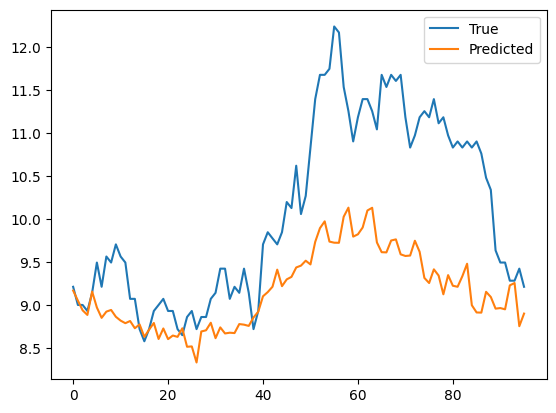

In [142]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.close()
plt.plot(batch_y[0,:,-1].flatten(), label='True')
plt.plot(test_outputs[0,:,-1].flatten(), label='Predicted')
plt.legend()
plt.show()

In [ ]:
test_pred = test_outputs[:,0,14].detach().numpy()    #（7200，1，16）
y_true = batch_y[:,0,14].detach().numpy()
corr = pd.Series(test_pred).corr(pd.Series(y_true))
corr

0.6966244246646524

<Axes: >

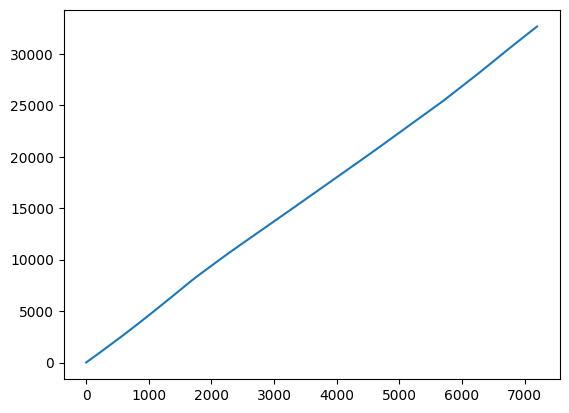

In [ ]:
(pd.Series(test_pred) * pd.Series(y_true)).cumsum().plot()